## This notebook will look at MA pm2.5 levels for 2019
## Particularly Worcester county will be observed

In [247]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display#%%
plt.style.use('dark_background')


In [248]:
import_path = '../../data/processed/ma_pm_25_2019.csv'
ma_pm_25_2019 = pd.read_csv(import_path, index_col=0)
ma_pm_25_2019.head()

,Site Num,POC,Latitude,Longitude,Datum,Date Local,Time Local,Date GMT,Time GMT,Sample Measurement,County Name,Date of Last Change
2221531,8,3,42.452299,-73.239648,NAD83,2019-01-01,00:00,2019-01-01,05:00,17.0,Berkshire,2019-03-14
2221532,8,3,42.452299,-73.239648,NAD83,2019-01-01,01:00,2019-01-01,06:00,11.0,Berkshire,2019-03-14
2221533,8,3,42.452299,-73.239648,NAD83,2019-01-01,02:00,2019-01-01,07:00,8.0,Berkshire,2019-03-14
2221534,8,3,42.452299,-73.239648,NAD83,2019-01-01,03:00,2019-01-01,08:00,14.0,Berkshire,2019-03-14
2221535,8,3,42.452299,-73.239648,NAD83,2019-01-01,04:00,2019-01-01,09:00,7.0,Berkshire,2019-03-14


In [249]:
# Extract Worcester County observations
Worcester = ma_pm_25_2019['County Name'] == 'Worcester'
# Represent Worcester PM2.5 aqi levels
worcester_2019 = ma_pm_25_2019.loc[Worcester]
display(worcester_2019.head())
worcester_2019.shape

,Site Num,POC,Latitude,Longitude,Datum,Date Local,Time Local,Date GMT,Time GMT,Sample Measurement,County Name,Date of Last Change
2333366,23,3,42.263955,-71.794322,WGS84,2019-01-01,00:00,2019-01-01,05:00,4.0,Worcester,2019-03-14
2333367,23,3,42.263955,-71.794322,WGS84,2019-01-01,01:00,2019-01-01,06:00,5.0,Worcester,2019-03-14
2333368,23,3,42.263955,-71.794322,WGS84,2019-01-01,02:00,2019-01-01,07:00,3.0,Worcester,2019-03-14
2333369,23,3,42.263955,-71.794322,WGS84,2019-01-01,03:00,2019-01-01,08:00,1.0,Worcester,2019-03-14
2333370,23,3,42.263955,-71.794322,WGS84,2019-01-01,04:00,2019-01-01,09:00,1.0,Worcester,2019-03-14


(8481, 12)

In [250]:
# reduce and remove low variance columns
low_var_worcester = [col for col in worcester_2019 if worcester_2019[col].nunique() == 1]
# low_var_worcester.remove('County Name')
print(low_var_worcester)

# remove low var col
worcester_2019.drop(columns=low_var_worcester, inplace=True)
worcester_2019.head()

['Site Num', 'POC', 'Latitude', 'Longitude', 'Datum', 'County Name']


/home/wkc/.local/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date Local,Time Local,Date GMT,Time GMT,Sample Measurement,Date of Last Change
2333366,2019-01-01,00:00,2019-01-01,05:00,4.0,2019-03-14
2333367,2019-01-01,01:00,2019-01-01,06:00,5.0,2019-03-14
2333368,2019-01-01,02:00,2019-01-01,07:00,3.0,2019-03-14
2333369,2019-01-01,03:00,2019-01-01,08:00,1.0,2019-03-14
2333370,2019-01-01,04:00,2019-01-01,09:00,1.0,2019-03-14


In [251]:
# drop gmt time as local time should sufice; this removes redundant data
worcester_2019.drop(columns=['Date GMT', 'Time GMT'], inplace=True)
worcester_2019.head()

/home/wkc/.local/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date Local,Time Local,Sample Measurement,Date of Last Change
2333366,2019-01-01,00:00,4.0,2019-03-14
2333367,2019-01-01,01:00,5.0,2019-03-14
2333368,2019-01-01,02:00,3.0,2019-03-14
2333369,2019-01-01,03:00,1.0,2019-03-14
2333370,2019-01-01,04:00,1.0,2019-03-14


In [252]:
worcester_2019.reset_index(drop=True, inplace=True)
worcester_2019

,Date Local,Time Local,Sample Measurement,Date of Last Change
0,2019-01-01,00:00,4.0,2019-03-14
1,2019-01-01,01:00,5.0,2019-03-14
2,2019-01-01,02:00,3.0,2019-03-14
3,2019-01-01,03:00,1.0,2019-03-14
4,2019-01-01,04:00,1.0,2019-03-14
...,...,...,...,...
8476,2019-12-31,19:00,10.0,2020-03-02
8477,2019-12-31,20:00,7.0,2020-03-02
8478,2019-12-31,21:00,9.0,2020-03-02
8479,2019-12-31,22:00,11.0,2020-03-02


Add a quality chart
* 0-12 is good
* 12.1 to 35.4 moderate
* 35.5 to 55.4 unhealthy to sensitive
* 55.5 to 150.4 Unhealthy

In [253]:
quality_levels = ['Good', 'Moderate', 'Unhealthy to Sens', 'Unhealthy']

quality = [quality_levels[0] if level < 12 else
           quality_levels[1] if level < 35.4 else
           quality_levels[2] if level < 55.4 else
           quality_levels[3] for level in worcester_2019['Sample Measurement']]

worcester_2019.insert(3, 'Quality', quality)
worcester_2019

,Date Local,Time Local,Sample Measurement,Quality,Date of Last Change
0,2019-01-01,00:00,4.0,Good,2019-03-14
1,2019-01-01,01:00,5.0,Good,2019-03-14
2,2019-01-01,02:00,3.0,Good,2019-03-14
3,2019-01-01,03:00,1.0,Good,2019-03-14
4,2019-01-01,04:00,1.0,Good,2019-03-14
...,...,...,...,...,...
8476,2019-12-31,19:00,10.0,Good,2020-03-02
8477,2019-12-31,20:00,7.0,Good,2020-03-02
8478,2019-12-31,21:00,9.0,Good,2020-03-02
8479,2019-12-31,22:00,11.0,Good,2020-03-02


## Now we have a Worcester Dataset that we can work with

In [254]:
# make a datetime column called Time containing both date and time of measurement
worcester_2019['Time'] = (worcester_2019['Date Local']) + ' ' + (worcester_2019['Time Local'])
worcester_2019['Time'] = pd.to_datetime(worcester_2019['Time'])
worcester_2019

<ipython-input-254-2c87e8ef8368>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worcester_2019['Time'] = (worcester_2019['Date Local']) + ' ' + (worcester_2019['Time Local'])
<ipython-input-254-2c87e8ef8368>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worcester_2019['Time'] = pd.to_datetime(worcester_2019['Time'])


,Date Local,Time Local,Sample Measurement,Quality,Date of Last Change,Time
0,2019-01-01,00:00,4.0,Good,2019-03-14,2019-01-01 00:00:00
1,2019-01-01,01:00,5.0,Good,2019-03-14,2019-01-01 01:00:00
2,2019-01-01,02:00,3.0,Good,2019-03-14,2019-01-01 02:00:00
3,2019-01-01,03:00,1.0,Good,2019-03-14,2019-01-01 03:00:00
4,2019-01-01,04:00,1.0,Good,2019-03-14,2019-01-01 04:00:00
...,...,...,...,...,...,...
8476,2019-12-31,19:00,10.0,Good,2020-03-02,2019-12-31 19:00:00
8477,2019-12-31,20:00,7.0,Good,2020-03-02,2019-12-31 20:00:00
8478,2019-12-31,21:00,9.0,Good,2020-03-02,2019-12-31 21:00:00
8479,2019-12-31,22:00,11.0,Good,2020-03-02,2019-12-31 22:00:00


In [255]:
# drop redundant columns
worcester_2019 = worcester_2019.drop(columns=['Date Local', 'Time Local'])

# Convert time to datetime and rename time to date period
worcester_2019['Time'] = pd.to_datetime(worcester_2019['Time'])
worcester_2019.rename(columns={'Time':'DateTime'}, inplace=True)
display(worcester_2019.dtypes)
worcester_2019

Sample Measurement            float64
Quality                        object
Date of Last Change            object
DateTime               datetime64[ns]
dtype: object

,Sample Measurement,Quality,Date of Last Change,DateTime
0,4.0,Good,2019-03-14,2019-01-01 00:00:00
1,5.0,Good,2019-03-14,2019-01-01 01:00:00
2,3.0,Good,2019-03-14,2019-01-01 02:00:00
3,1.0,Good,2019-03-14,2019-01-01 03:00:00
4,1.0,Good,2019-03-14,2019-01-01 04:00:00
...,...,...,...,...
8476,10.0,Good,2020-03-02,2019-12-31 19:00:00
8477,7.0,Good,2020-03-02,2019-12-31 20:00:00
8478,9.0,Good,2020-03-02,2019-12-31 21:00:00
8479,11.0,Good,2020-03-02,2019-12-31 22:00:00


In [256]:
# Omit year from date format as var_name suggests 2019 dates only
date_format = [pd.datetime.strftime(date, '%m-%d %H:%M') for date in worcester_2019['DateTime']]
worcester_2019.insert(0, 'Date', date_format)

# Set datetime as indext
worcester_2019.set_index(['DateTime'], inplace=True)
display(worcester_2019.dtypes)
worcester_2019

<ipython-input-256-576c3b9e28e4>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date_format = [pd.datetime.strftime(date, '%m-%d %H:%M') for date in worcester_2019['DateTime']]


Date                    object
Sample Measurement     float64
Quality                 object
Date of Last Change     object
dtype: object

,Date,Sample Measurement,Quality,Date of Last Change
DateTime,,,,
2019-01-01 00:00:00,01-01 00:00,4.0,Good,2019-03-14
2019-01-01 01:00:00,01-01 01:00,5.0,Good,2019-03-14
2019-01-01 02:00:00,01-01 02:00,3.0,Good,2019-03-14
2019-01-01 03:00:00,01-01 03:00,1.0,Good,2019-03-14
2019-01-01 04:00:00,01-01 04:00,1.0,Good,2019-03-14
...,...,...,...,...
2019-12-31 19:00:00,12-31 19:00,10.0,Good,2020-03-02
2019-12-31 20:00:00,12-31 20:00,7.0,Good,2020-03-02
2019-12-31 21:00:00,12-31 21:00,9.0,Good,2020-03-02


<AxesSubplot:xlabel='Date', ylabel='Sample Measurement'>

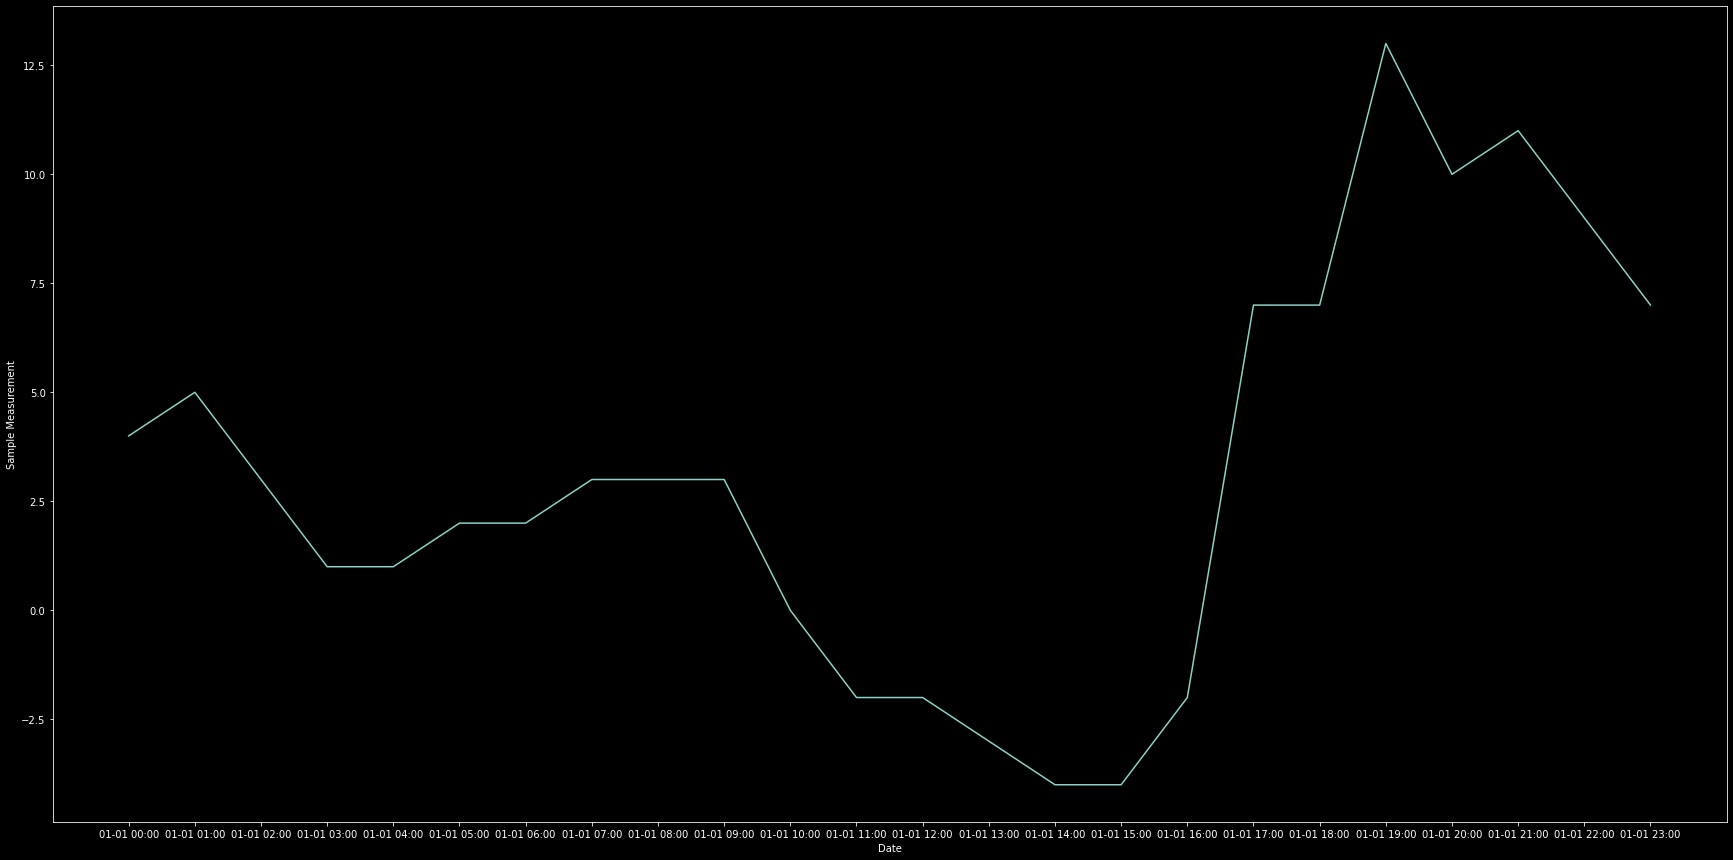

In [257]:
plt.figure(figsize=(30,15))
# sns.lineplot(data = worcester_2019.loc['2019-07-01':'2019-07-07'], x='Date', y='Sample Measurement')
sns.lineplot(data=worcester_2019[:24], x='Date', y='Sample Measurement')

<AxesSubplot:xlabel='Date', ylabel='Sample Measurement'>

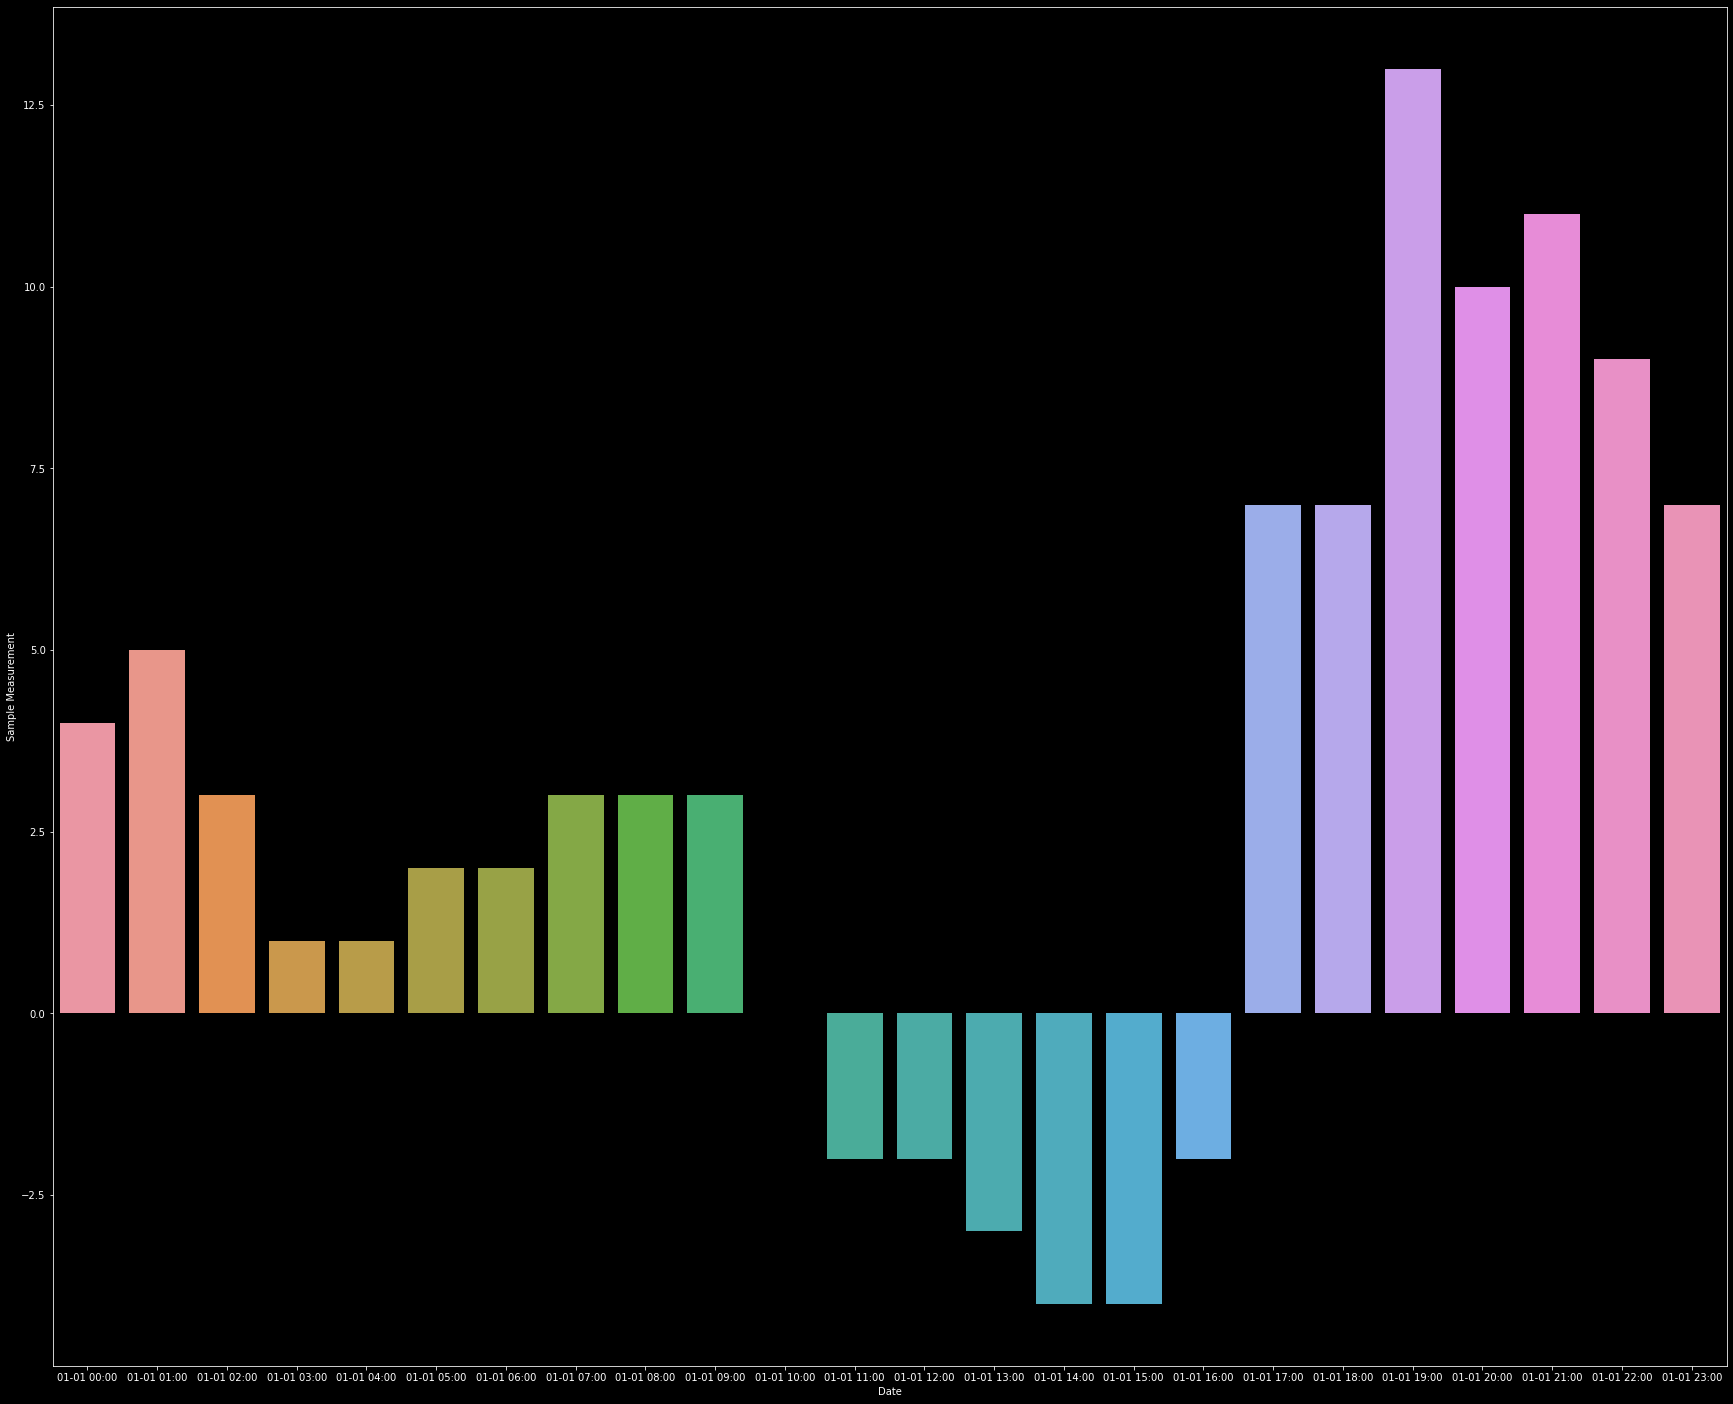

In [258]:
plt.figure(figsize=(30,25))
# worcester_2019.loc['2019-07-17']['Sample Measurement'].plot(kind='barh')
# plt.axvline(x=12, color='red')
sns.barplot(data=worcester_2019[:24], x='Date', y='Sample Measurement')

In [263]:
worcester_2019[:24]

,Date,Sample Measurement,Quality,Date of Last Change
DateTime,,,,
2019-01-01 00:00:00,01-01 00:00,4.0,Good,2019-03-14
2019-01-01 01:00:00,01-01 01:00,5.0,Good,2019-03-14
2019-01-01 02:00:00,01-01 02:00,3.0,Good,2019-03-14
2019-01-01 03:00:00,01-01 03:00,1.0,Good,2019-03-14
2019-01-01 04:00:00,01-01 04:00,1.0,Good,2019-03-14
2019-01-01 05:00:00,01-01 05:00,2.0,Good,2019-03-14
2019-01-01 06:00:00,01-01 06:00,2.0,Good,2019-03-14
2019-01-01 07:00:00,01-01 07:00,3.0,Good,2019-03-14
2019-01-01 08:00:00,01-01 08:00,3.0,Good,2019-03-14


Some statistical questions
* How likely a certain time outside where PM2.5 value is below
* Find average pm2.5 levels throughout months of the year 2019 (for now)
* Then find out which months appear the safest and most dangerous
* Find times in move found be within good
